# Stats of alignment coverage
<br>
Made by: Cynthia Soto <br>
Fecha: September 22, 2020 <br>
Datatype representation: expression levels CDS (gene_name) <br>
Data quantify with HTSeq (alignments done with STAR SA) <br>

***Case:*** <br>
Dataset: Infected and control samples of Arabidopsis (Col-0)<br>
Dataset composed by 20 RNASeq samples (fungi)<br>
Datatype representation: tvs file 
<br>
Stats were gotten from the STAR alignment's reports.
Relevant data was filtered (alignment output files) and joined in a unique stats file called: ~/my_statistics_STAR_alignment.txt 
<br>
Lastest md: 26 Nov 2020

In [151]:
# Libraries required
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [152]:
try:
    # Change the current working Directory    
    os.chdir("/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/")
    print("Directory changed:", os.getcwd() )
except OSError:
    print("Can't change the Current Working Directory")    

Directory changed: /home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis


In [153]:
df=pd.read_csv("results-data/my_statistics_STAR_alignment.txt", sep='\s+', header=None)
df.columns = ["sample","stat", "value"] 
df['value'] = df['value'].str.rstrip('%').astype('float') #/ 100.0
df.head(20)

,sample,stat,value
0,SRR3383696,unique_mapped_reads,98.20
1,SRR3383697,unique_mapped_reads,98.14
2,SRR3383779,unique_mapped_reads,93.55
3,SRR3383780,unique_mapped_reads,95.20
4,SRR10586397pe,unique_mapped_reads,89.07
5,SRR10586399pe,unique_mapped_reads,88.69
6,SRR364389,unique_mapped_reads,87.17
7,SRR364390,unique_mapped_reads,87.29
8,SRR364398,unique_mapped_reads,80.25
9,SRR364399,unique_mapped_reads,80.25


### Load meta-data labels 

In [154]:
lst_header=["sample","fungus","hpi","ID"] 
file='meta-data/metadata.csv'   ###Ojo. arreglar metadata2.cvs (index)
df_meta=pd.read_csv(file, sep='\,', engine='python',usecols=[0,4]) 
print(df_meta.index)
print(df_meta)

## filter for ID sample name
is_sample =  df_meta['sample']=='SRR364399'
sample = df_meta[is_sample]
ID_sample = sample['ID'].values[0]
ID_sample

RangeIndex(start=0, stop=20, step=1)
           sample         ID
0   SRR10586397pe       Bc24
1   SRR10586399pe       Bc24
2      SRR3383696       Bc12
3      SRR3383697       Bc12
4      SRR3383779       Bc18
5      SRR3383780       Bc18
6       SRR364389       Ch22
7       SRR364390       Ch22
8       SRR364398       Ch40
9       SRR364399       Ch40
10     SRR6283147       Ss30
11     SRR6283148       Ss30
12     SRR3383640  healthy12
13     SRR3383641  healthy12
14     SRR3383782  healthy18
15     SRR3383783  healthy18
16     SRR3383821  healthy24
17     SRR3383822  healthy24
18     SRR6283144  healthy30
19     SRR6283145  healthy30


'Ch40'

In [155]:
result = pd.merge(df, df_meta, on='sample')
result

,sample,stat,value,ID
0,SRR3383696,unique_mapped_reads,98.20,Bc12
1,SRR3383696,average_mapped_length,92.61,Bc12
2,SRR3383696,number_splices,4122662.00,Bc12
3,SRR3383696,mismatch_rate_per_base,0.12,Bc12
4,SRR3383696,deletion_average_length,1.37,Bc12
...,...,...,...,...
115,SRR6283145,average_mapped_length,118.09,healthy30
116,SRR6283145,number_splices,7965398.00,healthy30
117,SRR6283145,mismatch_rate_per_base,0.13,healthy30
118,SRR6283145,deletion_average_length,1.35,healthy30


In [165]:
# rect1 histogram
is_unique_mapped =  df[df['stat']=="unique_mapped_reads"]
#print(is_unique_mapped)
f_mapped = is_unique_mapped['value']
#type(f_mapped)
f_mapped_no_index = f_mapped.to_string(index=False)
print(f_mapped_no_index)

#rec2 histogram
is_deletion =  df[df['stat']=="reads_unmapped_too_short"]
f_deletion = is_deletion['value']
#print(f_deletion)
f_deletion_no_index = f_deletion.to_string(index=False)
print(f_deletion_no_index)

print(len(f_mapped))
print(len(f_deletion))

 98.20
 98.14
 93.55
 95.20
 89.07
 88.69
 87.17
 87.29
 80.25
 80.25
 32.35
 29.50
 98.31
 98.34
 98.13
 98.34
 98.09
 97.87
 97.51
 97.99
  0.24
  0.38
  4.98
  3.32
  9.74
 10.14
 11.17
 11.06
 16.39
 16.41
 66.31
 69.21
  0.07
  0.09
  0.07
  0.07
  0.09
  0.08
  0.73
  0.15
20
20


In [166]:
# porcentajes de alineamientos unicos
f_mapped.sort_values()
# porcentajes de reads_unmapped_too_short
f_deletion.sort_values()

115     0.07
114     0.07
112     0.07
117     0.08
116     0.09
113     0.09
119     0.15
60      0.24
61      0.38
118     0.73
63      3.32
62      4.98
64      9.74
65     10.14
67     11.06
66     11.17
68     16.39
69     16.41
70     66.31
71     69.21
Name: value, dtype: float64

In [167]:
## Get ID sample to label the plot 
# leyends
sample_names =  df['sample'].unique()
#print(sample_names)

sample_IDs =[]
for name in sample_names:
    #print(name)
    is_sample =  df_meta['sample']==name
    #print(is_sample)
    sIDs = df_meta[is_sample].values[0,1]
    sample_IDs.append(sIDs)

print(sample_IDs) 


['Bc12', 'Bc12', 'Bc18', 'Bc18', 'Bc24', 'Bc24', 'Ch22', 'Ch22', 'Ch40', 'Ch40', 'Ss30', 'Ss30', 'healthy12', 'healthy12', 'healthy18', 'healthy18', 'healthy24', 'healthy24', 'healthy30', 'healthy30']


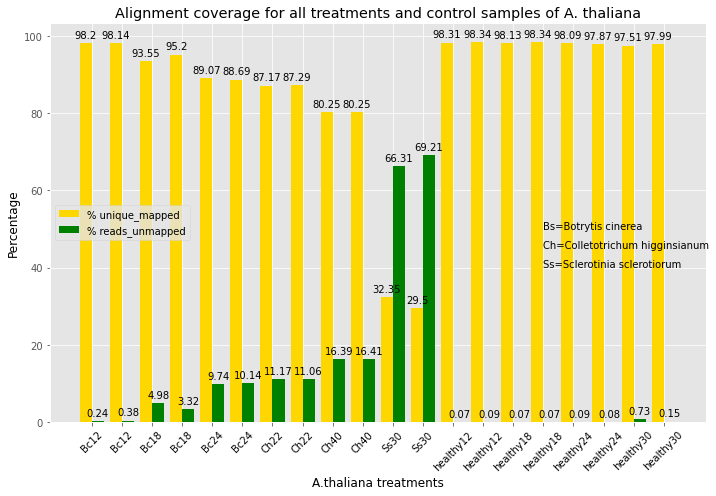

In [175]:
x = np.arange(len(sample_names))  # the label locations
width = 0.40  # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
plt.style.use('ggplot')

rects1 = ax.bar(x - width/2, f_mapped, width, label='% unique_mapped', color='gold')
rects2 = ax.bar(x + width/2, f_deletion, width, label='% reads_unmapped', color='green')
# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_ylabel('Percentage',color='black')
ax.set_xlabel('A.thaliana treatments',color='black')
ax.set_title('Alignment coverage for all treatments and control samples of A. thaliana')
ax.set_xticks(x)
ax.set_xticklabels(sample_IDs)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.legend(loc="center left")
plt.xticks(rotation=45, color='black')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()

str = 'Bs=Botrytis cinerea';
ax.annotate(str, xy=(15, 50))
str = 'Ch=Colletotrichum higginsianum';
ax.annotate(str, xy=(15, 45))
str = 'Ss=Sclerotinia sclerotiorum';
ax.annotate(str, xy=(15, 40))
 
#plt.savefig("../athal2_stats/alignment2_STAR_percentages.png")

plt.show()